# Esquemas de representacion

* *30 min* | Última modificación: Sept 22, 2020

## Preparacion de los datos

In [15]:
%%writefile documents.txt
The sky is blue and beautiful.
Love this blue and beautiful sky!
The quick brown fox jumps over the lazy dog.
A king's breakfast has sausages, ham, bacon, eggs, toast and beans
I love green eggs, ham, sausages and bacon!
The brown fox is quick and the blue dog is lazy!
The sky is very blue and the sky is very beautiful today
The dog is lazy but the brown fox is quick!

Writing documents.txt


In [16]:
##
## Lee el corpus
##
with open('documents.txt' , 'r') as f:
    documents = f.readlines()
    
documents = [t.replace('\n', '') for t in documents]
documents

['The sky is blue and beautiful.',
 'Love this blue and beautiful sky!',
 'The quick brown fox jumps over the lazy dog.',
 "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
 'I love green eggs, ham, sausages and bacon!',
 'The brown fox is quick and the blue dog is lazy!',
 'The sky is very blue and the sky is very beautiful today',
 'The dog is lazy but the brown fox is quick!']

In [17]:
%%writefile labels.txt
weather
weather
animals
food
food
animals
weather
animals

Overwriting labels.txt


In [18]:
##
## Lee las etiquetas
##
with open('labels.txt' , 'r') as f:
    labels = f.readlines()
    
labels = [t.replace('\n', '') for t in labels]
labels

['weather',
 'weather',
 'animals',
 'food',
 'food',
 'animals',
 'weather',
 'animals']

In [19]:
corpus = pd.DataFrame({'Document': documents, 'Labels': labels})
corpus

,Document,Labels
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, e...",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beaut...,weather
7,The dog is lazy but the brown fox is quick!,animals


## Preprocesamiento

In [23]:
import nltk
import re

tokenizer = nltk.WordPunctTokenizer()

STOPWORDS = nltk.corpus.stopwords.words('english')

def normalize_document(document):
    document = re.sub(r'[^a-zA-Z\s]', '', document, re.I|re.A)
    document = document.lower().strip()
    tokens = tokenizer.tokenize(document)
    tokens = [token for token in tokens if token not in STOPWORDS]
    document = ' '.join(tokens)
    return document
    
corpus['Normalized_Document'] = corpus.Document.map(normalize_document)
corpus

,Document,Labels,Normalized_Document
0,The sky is blue and beautiful.,weather,sky blue beautiful
1,Love this blue and beautiful sky!,weather,love blue beautiful sky
2,The quick brown fox jumps over the lazy dog.,animals,quick brown fox jumps lazy dog
3,"A king's breakfast has sausages, ham, bacon, e...",food,kings breakfast sausages ham bacon eggs toast ...
4,"I love green eggs, ham, sausages and bacon!",food,love green eggs ham sausages bacon
5,The brown fox is quick and the blue dog is lazy!,animals,brown fox quick blue dog lazy
6,The sky is very blue and the sky is very beaut...,weather,sky blue sky beautiful today
7,The dog is lazy but the brown fox is quick!,animals,dog lazy brown fox quick


## Bag of Words (BoW) model

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(
    # encoding='utf-8',              # codificacion del texto
    # decode_error='strict',         #
    # strip_accents=None,            # remocion de acentos
    # lowercase=True,                #
    # preprocessor=None,             #
    # tokenizer=None,                #
    # stop_words=None,               #
    # token_pattern='(?u)\b\w\w+\b', #
    # ngram_range=(1, 1),            #
    # analyzer='word',               #
    max_df=1.0,                      #
    min_df=1,                        #
    # max_features=None,             #
    # vocabulary=None,               #
    # binary=False                   #
)

bow = cv.fit_transform(corpus.Normalized_Document.tolist())

## sparse matrix
print(bow)

  (0, 17)	1
  (0, 3)	1
  (0, 2)	1
  (1, 17)	1
  (1, 3)	1
  (1, 2)	1
  (1, 14)	1
  (2, 15)	1
  (2, 5)	1
  (2, 8)	1
  (2, 11)	1
  (2, 13)	1
  (2, 6)	1
  (3, 12)	1
  (3, 4)	1
  (3, 16)	1
  (3, 10)	1
  (3, 0)	1
  (3, 7)	1
  (3, 18)	1
  (3, 1)	1
  (4, 14)	1
  (4, 16)	1
  (4, 10)	1
  (4, 0)	1
  (4, 7)	1
  (4, 9)	1
  (5, 3)	1
  (5, 15)	1
  (5, 5)	1
  (5, 8)	1
  (5, 13)	1
  (5, 6)	1
  (6, 17)	2
  (6, 3)	1
  (6, 2)	1
  (6, 19)	1
  (7, 15)	1
  (7, 5)	1
  (7, 8)	1
  (7, 13)	1
  (7, 6)	1


In [36]:
bow = bow.toarray()
bow

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]])

In [37]:
##
## Representacion como un dataframe
##
pd.DataFrame(bow, columns=cv.get_feature_names())

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0
5,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0
6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1
7,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0


## Bag of N-Grams model

In [41]:
cv = CountVectorizer(
    # encoding='utf-8',              # codificacion del texto
    # decode_error='strict',         #
    # strip_accents=None,            # remocion de acentos
    # lowercase=True,                #
    # preprocessor=None,             #
    # tokenizer=None,                #
    # stop_words=None,               #
    # token_pattern='(?u)\b\w\w+\b', #
    ngram_range=(2, 2),              #
    # analyzer='word',               #
    max_df=1.0,                      #
    min_df=1,                        #
    # max_features=None,             #
    # vocabulary=None,               #
    # binary=False                   #
)

bon = cv.fit_transform(corpus.Normalized_Document.tolist())
pd.DataFrame(bon.toarray(), columns=cv.get_feature_names()).T


,0,1,2,3,4,5,6,7
bacon eggs,0,0,0,1,0,0,0,0
beautiful sky,0,1,0,0,0,0,0,0
beautiful today,0,0,0,0,0,0,1,0
blue beautiful,1,1,0,0,0,0,0,0
blue dog,0,0,0,0,0,1,0,0
blue sky,0,0,0,0,0,0,1,0
breakfast sausages,0,0,0,1,0,0,0,0
brown fox,0,0,1,0,0,1,0,1
dog lazy,0,0,0,0,0,1,0,1
eggs ham,0,0,0,0,1,0,0,0


## TF-IDF model

$$tfidf= tf \times idf$$

* tf: term-frequency
* idf: 

$$1+\log\frac{N}{1+df(w)}$$

In [43]:
import numpy as np

from sklearn.feature_extraction.text import TfidfTransformer

cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(corpus.Normalized_Document.tolist())
cv_matrix = cv_matrix.toarray()


tt = TfidfTransformer(norm='l2', use_idf=True)
tt_matrix = tt.fit_transform(cv_matrix)
tt_matrix = tt_matrix.toarray()
vocab = cv.get_feature_names() 
pd.DataFrame(np.round(tt_matrix, 2), columns=vocab)


,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0.0, max_df=1.0, norm="l2", use_idf=True, smooth_idf=True)
tv_matrix = tv.fit_transform(corpus.Normalized_Document.tolist())
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names() 
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


## Similaridad de documentos

In [45]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix) 
similarity_df = pd.DataFrame(similarity_matrix) 
similarity_df

,0,1,2,3,4,5,6,7
0,1.000000,0.820599,0.000000,0.000000,0.000000,0.192353,0.817246,0.000000
1,0.820599,1.000000,0.000000,0.000000,0.225489,0.157845,0.670631,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.791821,0.000000,0.850516
3,0.000000,0.000000,0.000000,1.000000,0.506866,0.000000,0.000000,0.000000
4,0.000000,0.225489,0.000000,0.506866,1.000000,0.000000,0.000000,0.000000
5,0.192353,0.157845,0.791821,0.000000,0.000000,1.000000,0.115488,0.930989
6,0.817246,0.670631,0.000000,0.000000,0.000000,0.115488,1.000000,0.000000
7,0.000000,0.000000,0.850516,0.000000,0.000000,0.930989,0.000000,1.000000


In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix, "ward")
pd.DataFrame(
    Z,
    columns=["Document\Cluster 1", "Document\Cluster 2", "Distance", "Cluster Size"],
    dtype="object",
)

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,2,7,0.253098,2
1,0,6,0.308539,2
2,5,8,0.386952,3
3,1,9,0.489845,3
4,3,4,0.732945,2
5,11,12,2.69565,5
6,10,13,3.45108,8


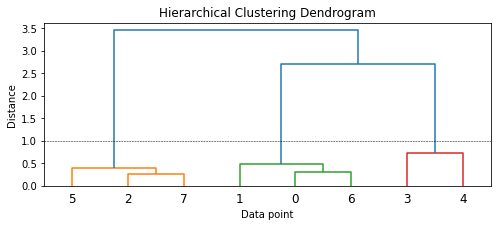

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3)) 
plt.title('Hierarchical Clustering Dendrogram') 
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)

In [50]:
from scipy.cluster.hierarchy import fcluster 

max_dist = 1.0
cluster_labels = fcluster(Z, max_dist, criterion='distance') 
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel']) 
pd.concat([corpus, cluster_labels], axis=1)

,Document,Labels,Normalized_Document,ClusterLabel
0,The sky is blue and beautiful.,weather,sky blue beautiful,2
1,Love this blue and beautiful sky!,weather,love blue beautiful sky,2
2,The quick brown fox jumps over the lazy dog.,animals,quick brown fox jumps lazy dog,1
3,"A king's breakfast has sausages, ham, bacon, e...",food,kings breakfast sausages ham bacon eggs toast ...,3
4,"I love green eggs, ham, sausages and bacon!",food,love green eggs ham sausages bacon,3
5,The brown fox is quick and the blue dog is lazy!,animals,brown fox quick blue dog lazy,1
6,The sky is very blue and the sky is very beaut...,weather,sky blue sky beautiful today,2
7,The dog is lazy but the brown fox is quick!,animals,dog lazy brown fox quick,1


## Topic Modeling --- Latent Dirichlet Allocation

In [52]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=3, max_iter=10000, random_state=0)
dt_matrix = lda.fit_transform(cv_matrix)
features = pd.DataFrame(dt_matrix, columns=['T1', 'T2', 'T3'])
features

,T1,T2,T3
0,0.832191,0.083480,0.084329
1,0.863554,0.069100,0.067346
2,0.047794,0.047776,0.904430
3,0.037243,0.925559,0.037198
4,0.049121,0.903076,0.047802
5,0.054902,0.047778,0.897321
6,0.888287,0.055697,0.056016
7,0.055704,0.055689,0.888607


In [53]:
tt_matrix = lda.components_
for topic_weights in tt_matrix:
    topic = [(token, weight) for token, weight in zip(vocab, topic_weights)] 
    topic = sorted(topic, key=lambda x: -x[1])
    topic = [item for item in topic if item[1] > 0.6]
    print(topic)
    print()

[('sky', 4.332439442470133), ('blue', 3.373774254787669), ('beautiful', 3.3323650509884386), ('today', 1.3325579855138987), ('love', 1.330415818217548)]

[('bacon', 2.33269586574902), ('eggs', 2.33269586574902), ('ham', 2.33269586574902), ('sausages', 2.33269586574902), ('love', 1.3354610533796558), ('beans', 1.3327735190105536), ('breakfast', 1.3327735190105536), ('kings', 1.3327735190105536), ('toast', 1.3327735190105536), ('green', 1.3325431515674175)]

[('brown', 3.3323473548404405), ('dog', 3.3323473548404405), ('fox', 3.3323473548404405), ('lazy', 3.3323473548404405), ('quick', 3.3323473548404405), ('jumps', 1.3324193772908193), ('blue', 1.2919423137963386)]

